# <b>A. <span style='color:#3A6D8C'>Introduction</span></b>

Klasifikasi dalam machine learning adalah proses pengelompokan data ke dalam kategori atau kelas tertentu berdasarkan fitur yang ada. Dalam klasifikasi, model dilatih menggunakan data yang sudah dilabeli (data pelatihan), di mana setiap data memiliki label atau kategori yang jelas. Setelah model dilatih, ia dapat digunakan untuk mengklasifikasikan data baru yang belum dilabeli.




# <b>B. <span style='color:#3A6D8C'>Data Digunakan</span></b>

<img src="https://sdgs.uib.ac.id/wp-content/uploads/2023/10/Goal-3.webp" width="60%">

`Good Health and Well-Being` adalah salah satu tujuan dari Sustainable Development Goals (SDGs) yang dicanangkan oleh PBB. Bertujuan untuk memastikan kehidupan yang sehat dan meningkatkan kesejahteraan untuk semua orang di semua usia. Beberapa sasaran utama dari tujuan ini meliputi:

* Mengurangi Angka Kematian Ibu dan Bayi: Meningkatkan akses ke layanan kesehatan dan perawatan maternitas untuk mengurangi kematian terkait kehamilan dan kelahiran.
* Menangani Penyakit Menular: Meningkatkan pencegahan dan pengobatan penyakit menular seperti HIV/AIDS, tuberkulosis, dan malaria.
* Kesehatan Mental: Meningkatkan dukungan untuk kesehatan mental dan kesejahteraan, serta mengurangi angka bunuh diri.
* Akses ke Layanan Kesehatan: Menjamin akses universal ke layanan kesehatan yang berkualitas dan terjangkau.
* Pencegahan Penyakit Tidak Menular: Mendorong gaya hidup sehat untuk mencegah penyakit tidak menular seperti `diabetes`, penyakit jantung, dan kanker.

Dilansir pada laman https://p2p.kemkes.go.id/wp-content/uploads/2023/08/Final-LAKIP-Ditjen-P2P-Semester-I-Tahun-2023.pdf, menyatakan bahwa Diabetes dengan Komplikasi merupakan
Penyebab Kematian tertinggi ketiga di Indonesia. Untuk itu

### <b>B.1. <span style='color:#55679C'>Ekstrak Data</span></b>

In [ ]:
import warnings
import numpy as np

warnings.filterwarnings("ignore")

In [ ]:
# Import library yang digunakan
import pandas as pd

# Proses ekstraksi data
data_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')

# Tampilkan hasilnya
display(data_diabetes)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### <b>B.2. <span style='color:#55679C'>Informasi Umum pada Data</span></b>

In [ ]:
# Informasi umum data
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


* `Gender` : Kolom ini menunjukkan jenis kelamin individu, biasanya dikategorikan sebagai "Male" atau "Female". Ini bisa mempengaruhi risiko dan perkembangan diabetes.
* `Age` : Usia individu dalam tahun. Usia adalah faktor risiko penting dalam perkembangan diabetes, dengan prevalensi yang meningkat seiring bertambahnya usia.
* `Hypertension` : Menunjukkan apakah individu memiliki hipertensi (tekanan darah tinggi) atau tidak. Hipertensi sering terkait dengan diabetes dan meningkatkan risiko komplikasi.
* `Heart Disease` : Menunjukkan apakah individu memiliki riwayat penyakit jantung. Penyakit jantung dan diabetes sering berjalan berdampingan, sehingga kolom ini penting untuk analisis.
* `Smoking History` : Menunjukkan riwayat merokok individu (misalnya, "Yes" atau "No"). Merokok dapat meningkatkan risiko diabetes dan komplikasinya.
* `BMI (Body Mass Index)` : Indeks massa tubuh yang dihitung berdasarkan berat dan tinggi badan. BMI yang tinggi sering dikaitkan dengan peningkatan risiko diabetes tipe 2.
* `HbA1c Level` : Tingkat hemoglobin A1c dalam darah, yang menunjukkan rata-rata kadar gula darah selama 2-3 bulan terakhir. Ini adalah indikator penting dalam manajemen diabetes.
* `Blood Glucose Level` : Kadar glukosa dalam darah saat pengukuran dilakukan. Kadar glukosa yang tinggi dapat menunjukkan adanya diabetes atau prediabetes.
* `Diabetes` : Kolom ini adalah label target yang menunjukkan apakah individu didiagnosis dengan diabetes atau tidak (misalnya, "Yes" atau "No"). Ini adalah hasil yang ingin diprediksi dalam analisis klasifikasi.

### <b>B.3. <span style='color:#55679C'>Isi Data</span></b>

In [ ]:
# Mendapatkan setiap isi pada data
for col in data_diabetes.columns:
    unik = data_diabetes[col].astype(str).unique().tolist()
    unik.sort()
    print(f"\033[33m{col}\033[0m")
    print(f"{', '.join(unik)}\n")

gender
Female, Male, Other

age
0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72, 0.8, 0.88, 1.0, 1.08, 1.16, 1.24, 1.32, 1.4, 1.48, 1.56, 1.64, 1.72, 1.8, 1.88, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 2.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 3.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 4.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 5.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 6.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 7.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 8.0, 80.0, 9.0

hypertension
0, 1

heart_disease
0, 1

smoking_history
No Info, current, ever, former, never, not current

bmi
10.01, 10.08, 10.14, 10.19, 10.21, 10.3, 10.34, 10.4, 10.5, 10.59, 10.6, 10.62, 10.64, 10.69, 10.76, 10.77, 10.86, 10.89, 10.91, 10.98, 11.0, 11.01, 11.05, 11.08, 11.09, 11.1, 11.16, 11.2, 11.24, 11.25, 11.28, 11.31, 11.34, 11.36, 11.38, 11.39, 11.4, 11.43, 

# <b>C. <span style='color:#3A6D8C'>Exploratory Data Analysis</span></b>

### <b>C.1. <span style='color:#55679C'>Main Problem</span></b>

In [ ]:
# Buat agregasi terlebih dahulu
proporsi_diabetes = data_diabetes.groupby('diabetes', as_index = False).agg(total = ('diabetes', 'count'))

# Tampilkan data
display(proporsi_diabetes)

,diabetes,total
0,0,91500
1,1,8500


In [ ]:
# Import library untuk visualisasi
import plotly.express as px

# Hitung total data
total_data = proporsi_diabetes['total'].sum()

# Warna
hijau_pucat = '#E0ECE4'
merah = '#FF4B5C'

# Buat pie chart
fig = px.pie(
    values = proporsi_diabetes['total'],
    names = proporsi_diabetes['diabetes'],
    color_discrete_sequence = [hijau_pucat, merah],
    hole = 0.65
)

# Atur posisi label
fig.update_traces(
    textposition = 'outside',
    textinfo = 'percent+label',
    hovertemplate='<b>%{label}</b><br>%{value} Person'
)

# Atur luas grafik, hapus legend dan beri judul
fig.update_layout(
    width = 800,
    height = 600,
    showlegend = False,
    margin = dict(l=160, r=200, t=100, b=30),
    title = dict(
        text = f"<b>Proporsi Status Penderita Diabetes</b><br><sup>Sebesar 8.5% terindikasi <span style='color:{merah}'><b>Diabetes</b></span></sup>",
        font = dict(
            size = 22,
            color = '#757882'
        ),
        y = 0.92,
        x = 0.10
    )
)

# Berikan informasi total pelanggan di tengah donut chart
fig.add_annotation(
    text = f'Total Data<br><b><span style="font-size: 28px;">{total_data}</b></span>',
    x = 0.5,
    y = 0.5,
    showarrow = False,
    font = dict(size = 20)
)

# Tampilkan grafik
fig.show(renderer = 'colab')

### <b>C.2. <span style='color:#55679C'>Statistik Deskriptif</span></b>

In [ ]:
# Ambil data angka
number_data = data_diabetes[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

# Hitung statistik deskriptif
statistics = pd.DataFrame({
    'mean' : number_data.mean().round(2),
    'median': number_data.median(),
    'modus': number_data.mode().iloc[0],
    'min': number_data.min(),
    'max': number_data.max(),
    'q1' : number_data.quantile(0.25),
    'q2' : number_data.quantile(0.50),
    'q3' : number_data.quantile(0.75),
    'stdev' : number_data.std().round(2)
})

# Tampilkan hasilnya
display(statistics.T)

,age,bmi,HbA1c_level,blood_glucose_level
mean,41.89,27.32,5.53,138.06
median,43.00,27.32,5.80,140.00
modus,80.00,27.32,6.60,130.00
min,0.08,10.01,3.50,80.00
max,80.00,95.69,9.00,300.00
q1,24.00,23.63,4.80,100.00
q2,43.00,27.32,5.80,140.00
q3,60.00,29.58,6.20,159.00
stdev,22.52,6.64,1.07,40.71


In [ ]:
is_diabetes = data_diabetes.loc[data_diabetes['diabetes'] == 1]

category_column = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

# Mendapatkan setiap isi pada data
for col in category_column:
    print(f"\033[33m{col}\033[0m")
    proportions = is_diabetes[col].value_counts().reset_index()
    proportions['percentage%'] = round((proportions['count'] / proportions['count'].sum()), 4) * 100
    display(proportions)
    print('\n')

gender


,gender,count,percentage%
0,Female,4461,52.48
1,Male,4039,47.52




hypertension


,hypertension,count,percentage%
0,0,6412,75.44
1,1,2088,24.56




heart_disease


,heart_disease,count,percentage%
0,0,7233,85.09
1,1,1267,14.91




smoking_history


,smoking_history,count,percentage%
0,never,3346,39.36
1,former,1590,18.71
2,No Info,1454,17.11
3,current,948,11.15
4,not current,690,8.12
5,ever,472,5.55


In [ ]:
# Import library yang dibutuhkan
import plotly.figure_factory as ff

def compare_distribution(data1, data2, col_name):
    hist_data = [data1, data2]
    group_labels = ['Diabetes', 'No Diabetes']

    fig = ff.create_distplot(
        hist_data,
        group_labels,
        show_hist = False,
        show_rug = False
    )

    fig.update_layout(
        width = 1000,
        height = 500,
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        title = dict(
            text = f"<b>Distribusi {col_name}</b><br><sup><sup>Pada Penderita Diabetes</sup></sup>",
            font = dict(
                size = 28,
                color = 'black'
            ),
            y = 0.92,
            x = 0.5
        )
    )

    fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

    # Tampilkan visualisasi
    fig.show()

In [ ]:
for col in number_data.columns:
    # Bagi data kedalam kelompok
    diabetes = data_diabetes[data_diabetes['diabetes'] == 1][col]
    no_diabetes = data_diabetes[data_diabetes['diabetes'] == 0][col]

    compare_distribution(data1 = diabetes, data2 = no_diabetes, col_name = col.upper())

### <b>C.3. <span style='color:#55679C'>Korelasi</span></b>

In [ ]:
# Import library yang dibutuhkan
import plotly.express as px

# Hitung korelasi
korelasi = number_data.corr('pearson')

# Buat Heat Map
fig = px.imshow(
    korelasi,
    text_auto = True,
    color_continuous_scale = 'Blues'
)

# Jangan tampilkan color axes / legend
fig.update_coloraxes(
    showscale = False
)

# Percantik tampilan
fig.update_layout(
    width = 800,
    height = 800,
    title = dict(
        text = "<b>Korelasi Antar Variable pada Data</b>",
        font = dict(
            size = 30,
            color = '#0E2954'
        ),
        y = 0.94,
        x = 0.5
    )
)

# Tampilkan hasil visualisasi
fig.show(renderer = 'colab')

### <b>C.4. <span style='color:#55679C'>Outliers</span></b>

In [ ]:
# Histogram Sales
import plotly.express as px

col_name = number_data.columns
color_name = ['#FF8F00', '#AF47D2', '#FFDB00', '#FFAD60']

for column, color in zip(col_name, color_name):
    fig = px.box(
        number_data,
        x = column,
        color_discrete_sequence  = [color],
    )

    fig.update_traces(
          marker_line_width = 1,
          marker_line_color = 'white'
    )

    fig.update_layout(
        width = 1000,
        height = 600,
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        title = dict(
            text = f"<b>Box Plot<br><span style='color:{color}; font-size: 15px;'>{column}</b>",
            font = dict(
                size = 28,
                color = '#757882'
            ),
            y = 0.92,
            x = 0.5
        ),
        yaxis = dict(
            title = '',
            showgrid = False,
            showline = False,
            showticklabels = False,
            zeroline = False,
        ),
        margin = dict(
            t = 80,
            b = 10,
            r = 20
        )
    )

    fig.show(renderer = 'colab')

# <b>D. <span style='color:#3A6D8C'>Proses Modelling</span></b>

### <b>D.1. <span style='color:#55679C'>Encoding</span></b>

Encoding pada data kategorik adalah proses mengubah variabel kategorik (yang terdiri dari label atau kategori) menjadi format numerik sehingga dapat digunakan dalam model machine learning.

* Label Encoding
* One-Hot Encoding
* Binary Encoding

In [ ]:
is_diabetes = data_diabetes.loc[data_diabetes['diabetes'] == 1].select_dtypes(include = 'object')

# Mendapatkan setiap isi pada data
for col in is_diabetes.columns:
    print(f"\033[33m{col}\033[0m")
    proportions = is_diabetes[col].value_counts().reset_index()
    proportions['percentage%'] = round((proportions['count'] / proportions['count'].sum()), 4) * 100
    display(proportions)
    print('\n')

gender


,gender,count,percentage%
0,Female,4461,52.48
1,Male,4039,47.52




smoking_history


,smoking_history,count,percentage%
0,never,3346,39.36
1,former,1590,18.71
2,No Info,1454,17.11
3,current,948,11.15
4,not current,690,8.12
5,ever,472,5.55


In [ ]:
# Lakukan encoding untuk gender
gender_code = data_diabetes['gender'].map({'Female' : 2, 'Male' : 1, 'Other' : 0})
data_diabetes.insert(1, 'gender_code', gender_code)

# Lakukan encoding untuk smoking history
smoking_history_code = data_diabetes['smoking_history'].map({
    'ever' : 0,
    'not current' : 1,
    'current' : 2,
    'No Info' : 3,
    'former' : 4,
    'never' : 5
})
data_diabetes.insert(6, 'smoking_history_code', smoking_history_code)

# Tampilkan hasilnya
display(data_diabetes)

,gender,gender_code,age,hypertension,heart_disease,smoking_history,smoking_history_code,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,2,80.0,0,1,never,5,25.19,6.6,140,0
1,Female,2,54.0,0,0,No Info,3,27.32,6.6,80,0
2,Male,1,28.0,0,0,never,5,27.32,5.7,158,0
3,Female,2,36.0,0,0,current,2,23.45,5.0,155,0
4,Male,1,76.0,1,1,current,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,2,80.0,0,0,No Info,3,27.32,6.2,90,0
99996,Female,2,2.0,0,0,No Info,3,17.37,6.5,100,0
99997,Male,1,66.0,0,0,former,4,27.83,5.7,155,0
99998,Female,2,24.0,0,0,never,5,35.42,4.0,100,0


### <b>D.2. <span style='color:#55679C'>Split Data</span></b>

In [ ]:
from sklearn.model_selection import train_test_split

# Definisikan variabel terikat dan bebas
X = data_diabetes[['gender_code', 'age', 'hypertension', 'heart_disease', 'smoking_history_code', 'bmi', 'HbA1c_level','blood_glucose_level']]
y = data_diabetes[['diabetes']]

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    stratify = y,
    random_state = 42
)

In [ ]:
y_train.value_counts().reset_index()

,diabetes,count
0,0,73200
1,1,6800


In [ ]:
y_test.value_counts().reset_index()

,diabetes,count
0,0,18300
1,1,1700


### <b>D.3. <span style='color:#55679C'>Handling Imbalance Data</span></b>

Over-sampling dan under-sampling adalah teknik yang digunakan untuk menangani masalah ketidakseimbangan kelas dalam dataset, di mana satu kelas memiliki jumlah contoh yang jauh lebih banyak dibandingkan kelas lainnya.

SMOTE (Synthetic Minority Over-sampling Technique) digunakan untuk menghasilkan contoh data sintetis untuk kelas minoritas dengan membuat titik data baru di antara contoh yang sudah ada.

In [ ]:
from imblearn.over_sampling import SMOTE

# Proses SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts().reset_index()

,diabetes,count
0,0,73200
1,1,73200


### <b>D.4. <span style='color:#55679C'>Modelling</span></b>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
DecTree = DecisionTreeClassifier(
    max_leaf_nodes = 8,
    criterion = 'entropy'
)

# Fit dt to the training set
DecTree.fit(X_resampled, y_resampled)

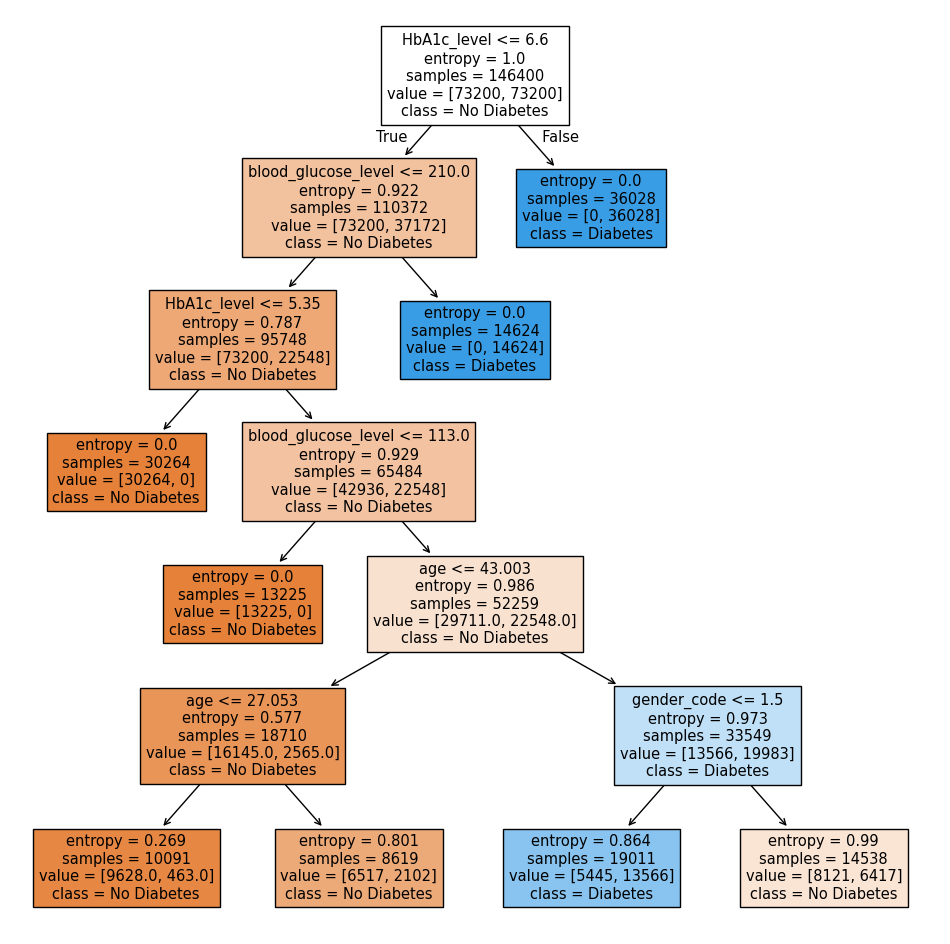

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Membuat plot pohon keputusan
fig, ax = plt.subplots(figsize=(12, 12))

tree.plot_tree(
    DecTree,
    feature_names = DecTree.feature_names_in_,
    class_names = ['No Diabetes', 'Diabetes'],
    filled = True,
    rounded = False,
    #edge_labels = ['No Diabetes', 'Diabetes'],
)

plt.show()

### <b>D.5. <span style='color:#55679C'>Metrics Evaluation</span></b>

In [ ]:
from sklearn import metrics

# Predict test set labels
y_pred = DecTree.predict(X_test)

# Menghitung dan mencetak laporan klasifikasi
classification_report = metrics.classification_report(y_test, y_pred)

print(classification_report)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     18300
           1       0.50      0.81      0.62      1700

    accuracy                           0.91     20000
   macro avg       0.74      0.87      0.78     20000
weighted avg       0.94      0.91      0.92     20000



### <b>D.5. <span style='color:#55679C'>Metrics Evaluation</span></b>

In [ ]:
# Mendapatkan feature importance
importances = DecTree.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
display(importance_df)

,Feature,Importance
6,HbA1c_level,0.559059
7,blood_glucose_level,0.336090
1,age,0.087503
0,gender_code,0.017348
2,hypertension,0.000000
3,heart_disease,0.000000
4,smoking_history_code,0.000000
5,bmi,0.000000
